In [1]:
%cd ..

/Users/maimai/Desktop/project/May


In [2]:
import builtins
builtins.uclresearch_topic = 'GIVENCHY'
# builtins.uclresearch_topic = 'HAWKING'
# builtins.uclresearch_topic = 'NYC'
# builtins.uclresearch_topic = 'FLORIDA'
from configuration import config
from configuration import dzcnapy_plotlib as dzcnapy

import pickle
import numpy as np
import pandas as pd
import os
import os.path
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# project_name = 'Givenchy_histogram'


('Reading config file from location: '
 '/Users/maimai/Desktop/project/May/configuration/env.properties')
{'calculate': {'analysis': True,
               'network': True,
               'uniquetweets': True,
               'uniqueusers': True},
 'data': {'dates': ['2018-03-11', '2018-03-12', '2018-03-13'],
          'eventname': "Givenchy's Death",
          'phrases': ['givenchy%20death', 'givenchy%20passed%20away'],
          'starttime': 'Mar 12 08:20:00 -0500 2018'},
 'path': {'crawl': {'followers': '/Users/maimai/Desktop/project/May/followers',
                    'friends': '/Users/maimai/Desktop/project/May/friends'},
          'cwd': '/Users/maimai/Desktop/project/May/data/givenchy',
          'ml': '/Users/maimai/Desktop/project/May/data/givenchy/pickle',
          'networkx': {'all': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_all.dat',
                       'friends': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_friends.dat',
       

In [3]:
n_bytes = 2**31
max_bytes = 2**31 - 1

path = "/Users/maimai/Desktop/project/May/data/givenchy/pickle"  

def write_to_pickle(file_path, data):

    bytes_out = pickle.dumps(data)
    with open(file_path, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])

def load_pickle(file_path):
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    return pickle.loads(bytes_in)

def loadModel(self):
    read_file = "data/" + self.model_name + ".dat"
    self.model = joblib.load(read_file)
    return self.model


In [4]:
################# 10 cases ###################
################# 10 cases ###################
A_single = load_pickle(path+'/Stanford_network_simulation_0.6_a.pkl')
B_sequential = load_pickle(path+'/Stanford_network_simulation_0.6_b_new.pkl')
C_sequential = load_pickle(path+'/Stanford_network_simulation_0.6_c_new.pkl')

Cen_Degree = load_pickle(path+'/Stanford_network_simulation_Degree_5.pkl')
Cen_Betweenness = load_pickle(path+'/Stanford_network_simulation_betweenness_5.pkl')
Cen_Eigencentrality = load_pickle(path+'/Stanford_network_simulation_eigencentrality_5.pkl')

Active_low = load_pickle(path+'/Stanford_network_simulation_active_low.pkl')
Active_high = load_pickle(path+'/Stanford_network_simulation_active_high.pkl')

# Dynamic = load_pickle(path+'/Stanford_network_simulation_active_low.pkl')
# Combined = load_pickle(path+'/Stanford_network_simulation_active_low.pkl')

unique_users = [A_single, B_sequential, C_sequential,
        Cen_Degree, Cen_Betweenness, Cen_Eigencentrality,
        Active_low,Active_high]

# for i in range(0,8):
#     x=[t for t in range(0,300)]
#     unique_users[i][unique_users[i].time_lapsed.isin(x)]
# unique_users[1]

In [5]:
def get_colors(depth):
    return sns.cubehelix_palette(depth, start=3, rot=1, reverse=True)
    sns.palplot(color)

In [6]:
######################## for active_low and active_high ##########################
######################## for active_low and active_high ##########################
# def plot_time_lapsed_vs_newly_infected_users(unique_users):
#     depth = max(unique_users.generations) + 1
#     window = 30
#     timeframe =300
# #     title = 'time lapsed vs newly infected users for event {}'.format(unique_users)
#     d = pd.DataFrame(0, index=np.arange(int(timeframe)/window), columns=range(depth))
#     for i in range(int(int(timeframe)/window)):
#         data = unique_users[(unique_users.time_lapsed >= (i)*window) & (unique_users.time_lapsed < (i+1)*window)]
#         for generation in range(depth):
#             d.iloc[i, generation] = sum(data.generations == generation)
#     colors = get_colors(depth)
#     ax = d.plot.bar(
#         stacked=True, 
#         color = colors
#     );
#     ax.set_xticks(range(10))
#     ax.set_xticklabels([i*30 for i in range(10)])
#     ax.set_xlabel('time lapsed')
#     ax.set_ylabel('number of newly infected users')
#     patchList = []
#     for index in range(depth):
#         data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
#         patchList.append(data_key)
#     plt.legend(handles=patchList)
#     dzcnapy.plot(title, [15, 9], save=True)
    
# for i in range(6,8):
#     title_name = ["A_single", "B_sequential", "C_sequential",
#         "Cen_Degree", "Cen_Betweenness", "Cen_Eigencentrality",
#         "Active_low","Active_high"]
#     title = title_name[i]
#     x=[t for t in range(0,300)]
#     unique_users[i][unique_users[i].time_lapsed.isin(range(0,6))]
#     plot_time_lapsed_vs_newly_infected_users(unique_users[i])

5


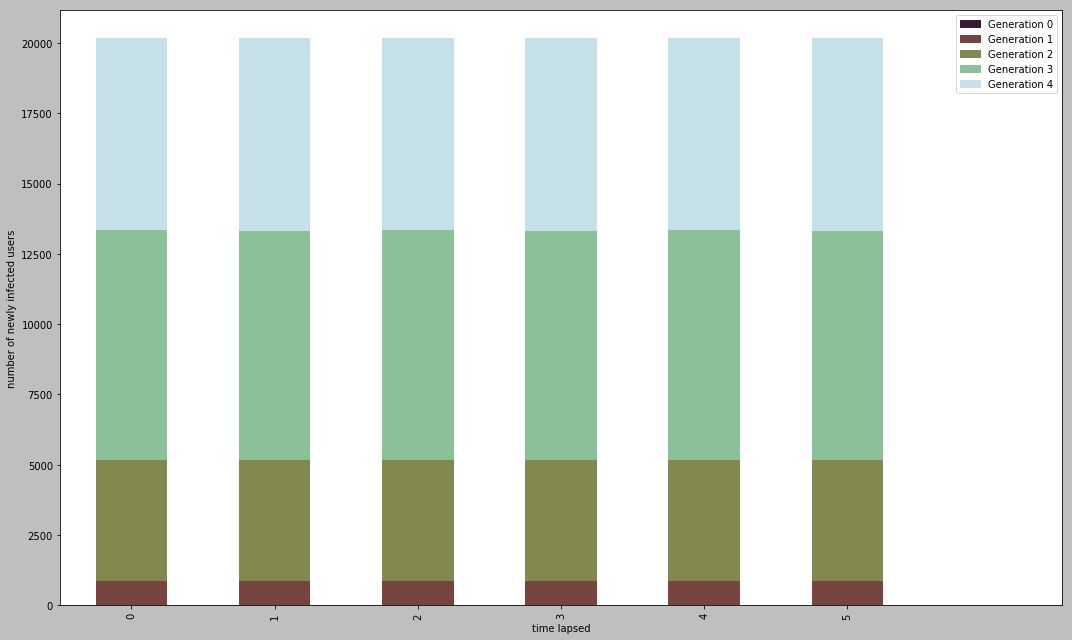

5


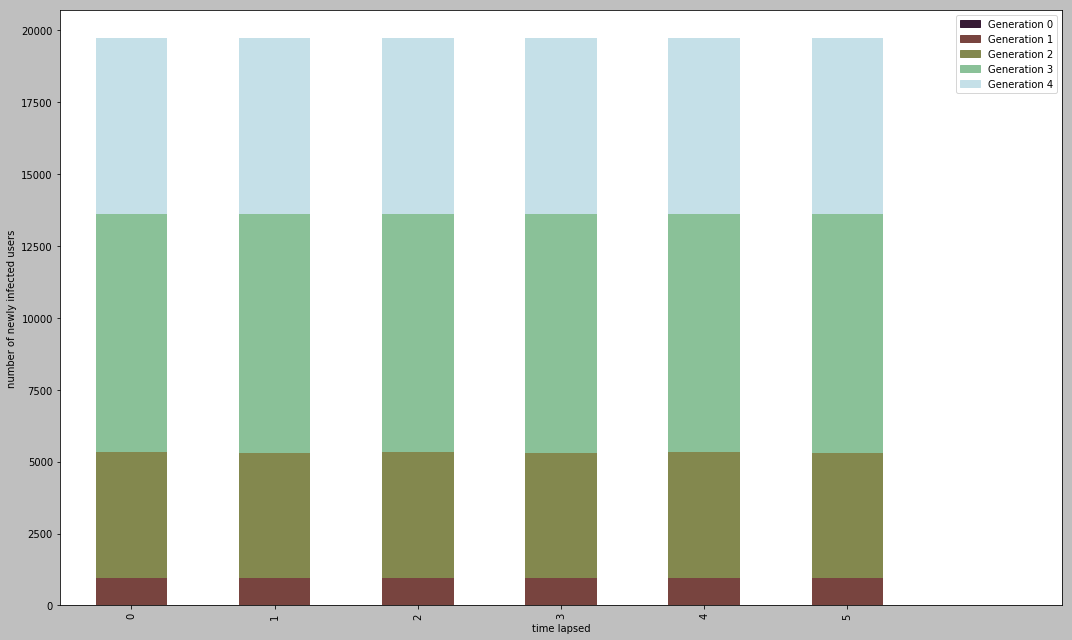

5


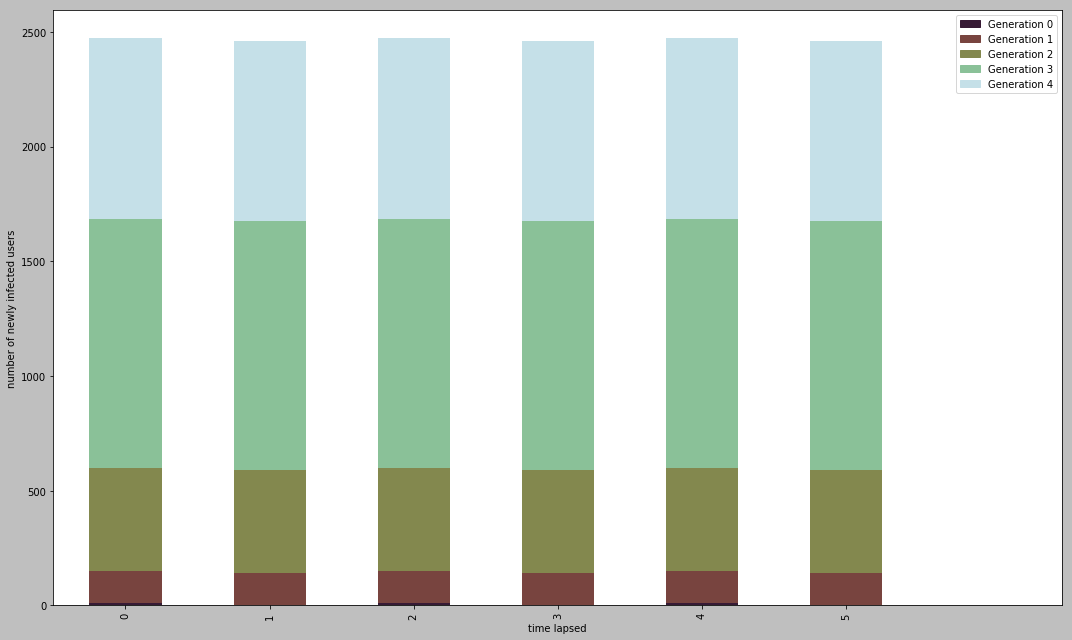

In [16]:
######################## for centrality ##########################
######################## for centrality ##########################
def plot_time_lapsed_vs_newly_infected_users(unique_users):
    depth = 5
    print(depth)
    window = 1
    timeframe = 6
#     title = 'time lapsed vs newly infected users for event {}'.format(unique_users)
    d = pd.DataFrame(0, index=np.arange((int(timeframe)/window)+1), columns=range(depth))
    for i in range(int(int(timeframe)/window)):
        data = unique_users[(unique_users.time_lapsed) >= i & (unique_users.time_lapsed < i+1)]
        for generation in range(depth):
            d.iloc[i, generation] = sum(data.generations == generation)
    colors = get_colors(depth)
    ax = d.plot.bar(
        stacked=True, 
        color = colors
    );
    ax.set_xticks(range(6))
    ax.set_xticklabels([i for i in range(6)])
    ax.set_xlabel('time lapsed')
    ax.set_ylabel('number of newly infected users')
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.plot(title, [15, 9], save=True)
    
for i in range(3,6):
    title_name = ["A_single", "B_sequential", "C_sequential",
        "Cen_Degree", "Cen_Betweenness", "Cen_Eigencentrality",
        "Active_low","Active_high"]
    title = title_name[i]
    x=[t for t in range(0,300)]
    unique_users[i][unique_users[i].time_lapsed.isin(range(0,6))]
    plot_time_lapsed_vs_newly_infected_users(unique_users[i])

In [12]:
Cen_Degree[Cen_Degree.generations.isin([0,1,2,3,4,5])]

,t_current,user_id,source_candidates,infec_candidates,followers_count,friends_count,source_id,seed_user_id,SIR,generations,time_lapsed,time_since_seed,infeclen
3,NaN,28465635,"[2, 111, 36, 158, 83, 118, 179, 148, 65, 130, ...","[161, 38, 86, 76, 12, 84, 72, 141, 100, 8, 53,...",57992,1482,40981798,59804598,1,3,4,NaN,91
5,NaN,18996905,"[4, 64, 42, 173, 66, 155, 153, 112, 43, 156, 2...","[63, 129, 9, 1, 72, 4170, 14875, 18521, 14885,...",284075,68,813286,813286,1,1,2,NaN,32
12,NaN,19705747,"[159, 62, 3, 61, 82, 87, 193, 146, 33, 165, 80...","[1, 51, 84, 58, 72, 4112, 16960, 4219, 22771, ...",669869,600,17471459,18581803,1,3,3,NaN,59
40,NaN,14925700,"[31, 160, 0, 92, 73, 16, 88, 108, 84, 140, 37,...","[5, 14885]",672809,891,19063323,18581803,1,4,4,NaN,2
50,NaN,6581292,"[134, 103, 86, 174, 43, 37, 96, 62, 0, 83, 75,...","[49, 10, 58, 122, 84, 145, 79, 27, 93, 72, 1, ...",15798,306,21111883,5442012,1,4,4,NaN,29
58,NaN,40981798,"[57, 90, 50, 8, 108, 133, 148, 11, 110, 171, 1...","[25, 51, 129, 39, 79, 74, 52, 29, 83, 66, 32, ...",5406079,668,42164376,59804598,1,2,2,NaN,55
70,NaN,157829215,"[16, 33, 0, 54, 156, 146, 25, 62, 123, 36, 2, ...","[20, 88, 129, 75, 140, 22, 102, 147, 118, 51, ...",11064,603,19063323,18581803,1,4,4,NaN,114
75,NaN,19493072,"[73, 118, 20, 77, 86, 103, 94, 70, 154, 47, 96...","[11, 98, 10, 160, 146, 16, 5, 4, 102, 64, 49, ...",46698,142,40981798,59804598,1,3,4,NaN,92
129,NaN,18951737,"[108, 58, 70, 76, 88, 103, 61, 11, 18, 49, 52,...","[72, 155, 140, 1, 9, 10, 84, 40, 51, 14875, 18...",12144,114,18996905,813286,1,2,4,NaN,59
198,NaN,767809,"[197, 209, 224, 211, 240]",[230],3556,332,9973842,5442012,1,4,4,NaN,1
